# Catalog
1. [Original Data](#original)
2. [Counterfactual(Dist.)](#distribution)
3. [Counterfactual(Cost)](#cost)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter

In [2]:
!pip install pandas --upgrade

# Original Data <a name="original"></a>

## Tables

### Profit by Groups

In [3]:
# 3 Groups
profit3_df = pd.DataFrame({"Small (<20)": {"Current": 9.07, "First-Degree PD": 18.35, "Linear": 9.15, "Nonlinear": 9.57},
              "Medium (20-49)": {"Current": 4.81, "First-Degree PD": 10.50, "Linear": 5.15, "Nonlinear": 5.65},
              "Large (≥50)": {"Current": 4.38, "First-Degree PD": 9.93, "Linear": 4.41, "Nonlinear": 4.98}})
profit3_df["Total"] = profit3_df.sum(axis=1)
profit3_df

,Small (<20),Medium (20-49),Large (≥50),Total
Current,9.07,4.81,4.38,18.26
First-Degree PD,18.35,10.50,9.93,38.78
Linear,9.15,5.15,4.41,18.71
Nonlinear,9.57,5.65,4.98,20.20


In [4]:
print(profit3_df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Small (<20) &  Medium (20-49) &  Large (≥50) &  Total \\
\midrule
Current         &         9.07 &            4.81 &         4.38 &  18.26 \\
First-Degree PD &        18.35 &           10.50 &         9.93 &  38.78 \\
Linear          &         9.15 &            5.15 &         4.41 &  18.71 \\
Nonlinear       &         9.57 &            5.65 &         4.98 &  20.20 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\147725666.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(profit3_df.to_latex())


In [5]:
# 5 groups
profit5_df = pd.DataFrame({"Group1 (<10)": {"Current": 4.82, "First-Degree PD": 10.47, "Linear": 4.71, "Nonlinear": 5.09},
              "Group2 (10-19)": {"Current": 4.25, "First-Degree PD": 7.88, "Linear": 4.44, "Nonlinear": 4.48},
              "Group3 (20-49)": {"Current": 4.81, "First-Degree PD": 10.50, "Linear": 5.15, "Nonlinear": 5.65},
              "Group4 (50-99)": {"Current": 2.22, "First-Degree PD": 4.66, "Linear": 2.26, "Nonlinear": 2.64},
              "Group5 (≥100)": {"Current": 2.16, "First-Degree PD": 5.27, "Linear": 2.15, "Nonlinear": 2.33}})
profit5_df["Total"] = profit5_df.sum(axis=1)
profit5_df

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Current,4.82,4.25,4.81,2.22,2.16,18.26
First-Degree PD,10.47,7.88,10.50,4.66,5.27,38.78
Linear,4.71,4.44,5.15,2.26,2.15,18.71
Nonlinear,5.09,4.48,5.65,2.64,2.33,20.19


In [6]:
print(profit5_df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Group1 (<10) &  Group2 (10-19) &  Group3 (20-49) &  Group4 (50-99) &  Group5 (≥100) &  Total \\
\midrule
Current         &          4.82 &            4.25 &            4.81 &            2.22 &           2.16 &  18.26 \\
First-Degree PD &         10.47 &            7.88 &           10.50 &            4.66 &           5.27 &  38.78 \\
Linear          &          4.71 &            4.44 &            5.15 &            2.26 &           2.15 &  18.71 \\
Nonlinear       &          5.09 &            4.48 &            5.65 &            2.64 &           2.33 &  20.19 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\3227267008.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(profit5_df.to_latex())


### Consumer Welfare by Groups

In [7]:
cs_df = pd.DataFrame({"Group1 (<10)": {"Current": 1.99, "First-Degree PD": 0, "Linear": 4.31, "Nonlinear": 2.86},
              "Group2 (10-19)": {"Current": 1.61, "First-Degree PD": 0, "Linear": 2.47, "Nonlinear": 2.22},
              "Group3 (20-49)": {"Current": 1.51, "First-Degree PD": 0, "Linear": 1.84, "Nonlinear": 2.83},
              "Group4 (50-99)": {"Current": 0.72, "First-Degree PD": 0, "Linear": 0.73, "Nonlinear": 1.16},
              "Group5 (≥100)": {"Current": 0.87, "First-Degree PD": 0, "Linear": 0.75, "Nonlinear": 1.12}})
cs_df["Total"] = cs_df.sum(axis=1)
cs_df

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Current,1.99,1.61,1.51,0.72,0.87,6.70
First-Degree PD,0.00,0.00,0.00,0.00,0.00,0.00
Linear,4.31,2.47,1.84,0.73,0.75,10.10
Nonlinear,2.86,2.22,2.83,1.16,1.12,10.19


In [8]:
print(cs_df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Group1 (<10) &  Group2 (10-19) &  Group3 (20-49) &  Group4 (50-99) &  Group5 (≥100) &  Total \\
\midrule
Current         &          1.99 &            1.61 &            1.51 &            0.72 &           0.87 &   6.70 \\
First-Degree PD &          0.00 &            0.00 &            0.00 &            0.00 &           0.00 &   0.00 \\
Linear          &          4.31 &            2.47 &            1.84 &            0.73 &           0.75 &  10.10 \\
Nonlinear       &          2.86 &            2.22 &            2.83 &            1.16 &           1.12 &  10.19 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\2609820234.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(cs_df.to_latex())


### Social Welfare by Groups

In [9]:
sw_df = profit5_df + cs_df
sw_df

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Current,6.81,5.86,6.32,2.94,3.03,24.96
First-Degree PD,10.47,7.88,10.50,4.66,5.27,38.78
Linear,9.02,6.91,6.99,2.99,2.90,28.81
Nonlinear,7.95,6.70,8.48,3.80,3.45,30.38


In [10]:
print(sw_df.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  Group1 (<10) &  Group2 (10-19) &  Group3 (20-49) &  Group4 (50-99) &  Group5 (≥100) &  Total \\
\midrule
Current         &          6.81 &            5.86 &            6.32 &            2.94 &           3.03 &  24.96 \\
First-Degree PD &         10.47 &            7.88 &           10.50 &            4.66 &           5.27 &  38.78 \\
Linear          &          9.02 &            6.91 &            6.99 &            2.99 &           2.90 &  28.81 \\
Nonlinear       &          7.95 &            6.70 &            8.48 &            3.80 &           3.45 &  30.38 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\4214689937.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sw_df.to_latex())


## Graphs

In [11]:
for Type, df in {"Profit": profit5_df, "Consumer Welfare": cs_df, "Social Welfare": sw_df}.items():
    df.reset_index(names="Method", inplace=True)
    df["Type"] = Type

In [12]:
# Create dataframe for visualization
welfare_df = (pd.concat([profit5_df, cs_df, sw_df])
                .melt(id_vars=["Method", "Type", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_df.head()

,Method,Type,Total,Group,Value
0,Current,Profit,18.26,Group1 (<10),4.82
1,First-Degree PD,Profit,38.78,Group1 (<10),10.47
2,Linear,Profit,18.71,Group1 (<10),4.71
3,Nonlinear,Profit,20.19,Group1 (<10),5.09
4,Current,Consumer Welfare,6.70,Group1 (<10),1.99


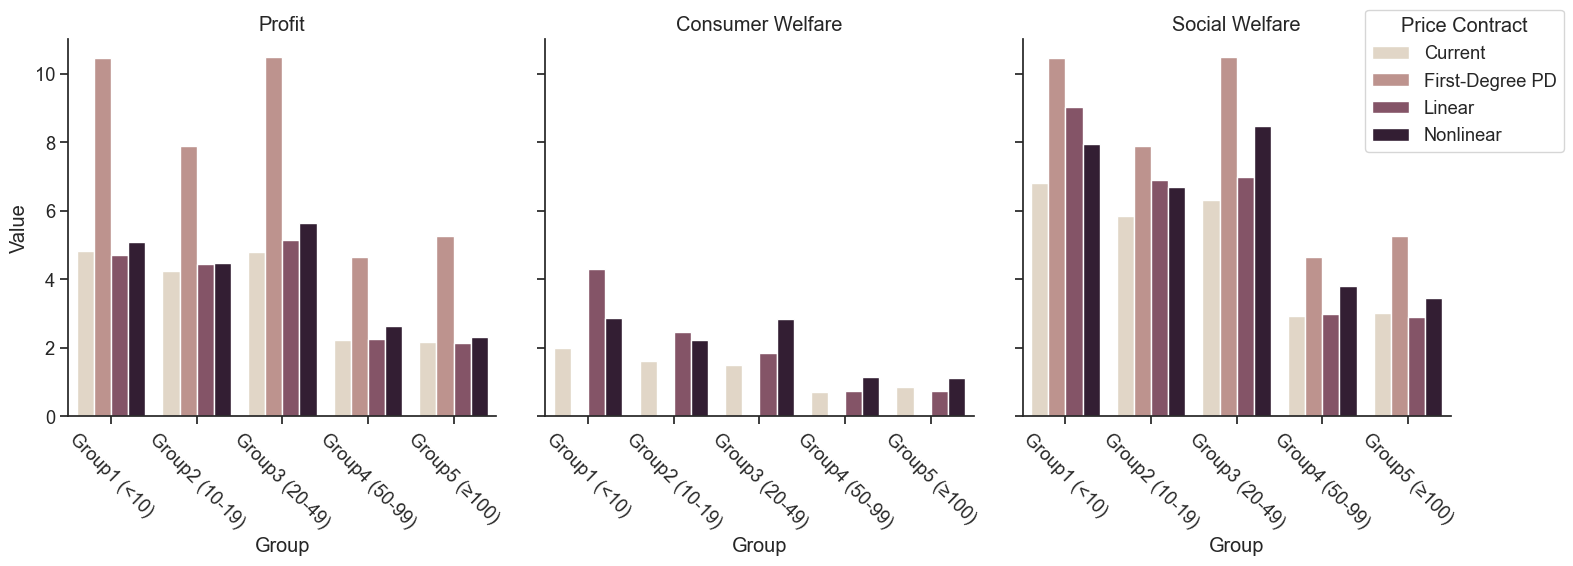

In [13]:
# Barplot
sns.set(font_scale=1.2)
sns.set_style("ticks")
bar = (sns.catplot(data=welfare_df,
            x="Group", y="Value", hue="Method",
            col="Type", kind="bar",
            palette="ch:.25",
            legend=False)
   .set_titles(col_template="{col_name}")
   .set_xticklabels(rotation=-45))

plt.legend(loc=(0.8, 0.7), title="Price Contract");

bar.savefig("fig/groups_bar.svg", dpi=400)

In [14]:
# Pointplot
point = (sns.catplot(data=welfare_df,
            x="Group", y="Value", hue="Method",
            col="Type", kind="point",
            palette="ch:.25",
            legend=False)
   .set_titles(col_template="{col_name}")
   .set_xticklabels(rotation=-45))

plt.legend(loc=(0.8, 0.7), title="Price Contract");

point.savefig("fig/groups_point.svg", dpi=400)

# Counterfactual (Dist.) <a name="distribution"></a>

$Note: (f) -2\gamma_{med}, \gamma_{large}; (i) 2\gamma_{med}, -\gamma_{large}$

## Local VS Global

### Profit by Groups

In [15]:
profit_f = pd.DataFrame({"Group1 (<10)": {"Local": 5.09, "Global": 4.98},
              "Group2 (10-19)": {"Local": 4.50, "Global": 3.97},
              "Group3 (20-49)": {"Local": 9.35, "Global": 12.78},
              "Group4 (50-99)": {"Local": 2.64, "Global": 2.62},
              "Group5 (≥100)": {"Local": 2.29, "Global": 2.36}})
profit_f["Total"] = profit_f.sum(axis=1)
profit_f

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,5.09,4.50,9.35,2.64,2.29,23.87
Global,4.98,3.97,12.78,2.62,2.36,26.71


In [16]:
profit_i = pd.DataFrame({"Group1 (<10)": {"Local": 5.09, "Global": 5.09},
              "Group2 (10-19)": {"Local": 4.31, "Global": 4.47},
              "Group3 (20-49)": {"Local": 3.37, "Global": 1.61},
              "Group4 (50-99)": {"Local": 2.43, "Global": 5.21},
              "Group5 (≥100)": {"Local": 4.38, "Global": 5.45}})
profit_i["Total"] = profit_i.sum(axis=1)
profit_i

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,5.09,4.31,3.37,2.43,4.38,19.58
Global,5.09,4.47,1.61,5.21,5.45,21.83


In [17]:
print(pd.concat([profit_f, profit_i], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local  &          5.09 &          5.09 &            4.50 &            4.31 &            9.35 &            3.37 &            2.64 &            2.43 &           2.29 &           4.38 &  23.87 &  19.58 \\
Global &          4.98 &          5.09 &            3.97 &            4.47 &           12.78 &            1.61 &            2.62 &            5.21 &           2.36 &           5.45 &  26.71 &  21.83 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\1403626567.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([profit_f, profit_i], axis=1).sort_index(axis=1).to_latex())


### Consumer Welfare by Groups

In [18]:
cs_f = pd.DataFrame({"Group1 (<10)": {"Local": 2.86, "Global": 2.28},
              "Group2 (10-19)": {"Local": 2.21, "Global": 1.26},
              "Group3 (20-49)": {"Local": 8.55, "Global": 8.05},
              "Group4 (50-99)": {"Local": 1.16, "Global": 1.09},
              "Group5 (≥100)": {"Local": 1.10, "Global": 1.10}})
cs_f["Total"] = cs_f.sum(axis=1)
cs_f

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,2.86,2.21,8.55,1.16,1.1,15.88
Global,2.28,1.26,8.05,1.09,1.1,13.78


In [19]:
cs_i = pd.DataFrame({"Group1 (<10)": {"Local": 2.86, "Global": 2.86},
              "Group2 (10-19)": {"Local": 2.38, "Global": 2.38},
              "Group3 (20-49)": {"Local": 2.06, "Global": 0.43},
              "Group4 (50-99)": {"Local": 4.40, "Global": 2.82},
              "Group5 (≥100)": {"Local": 2.97, "Global": 2.87}})
cs_i["Total"] = cs_i.sum(axis=1)
cs_i

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,2.86,2.38,2.06,4.40,2.97,14.67
Global,2.86,2.38,0.43,2.82,2.87,11.36


In [20]:
print(pd.concat([cs_f, cs_i], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local  &          2.86 &          2.86 &            2.21 &            2.38 &            8.55 &            2.06 &            1.16 &            4.40 &            1.1 &           2.97 &  15.88 &  14.67 \\
Global &          2.28 &          2.86 &            1.26 &            2.38 &            8.05 &            0.43 &            1.09 &            2.82 &            1.1 &           2.87 &  13.78 &  11.36 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\1699107092.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([cs_f, cs_i], axis=1).sort_index(axis=1).to_latex())


### Social Welfare by Groups

In [21]:
sw_f = profit_f + cs_f
sw_f

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,7.95,6.71,17.90,3.80,3.39,39.75
Global,7.26,5.23,20.83,3.71,3.46,40.49


In [22]:
sw_i = profit_i + cs_i
sw_i

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
Local,7.95,6.69,5.43,6.83,7.35,34.25
Global,7.95,6.85,2.04,8.03,8.32,33.19


In [23]:
print(pd.concat([sw_f, sw_i], axis=1).sort_index(axis=1).to_latex())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\2057224701.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([sw_f, sw_i], axis=1).sort_index(axis=1).to_latex())


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local  &          7.95 &          7.95 &            6.71 &            6.69 &           17.90 &            5.43 &            3.80 &            6.83 &           3.39 &           7.35 &  39.75 &  34.25 \\
Global &          7.26 &          7.95 &            5.23 &            6.85 &           20.83 &            2.04 &            3.71 &            8.03 &           3.46 &           8.32 &  40.49 &  33.19 \\
\bottomrule
\end{tabular}



### Graphs

In [24]:
figs = ["f", "i"]
for Type, dfs in {"Profit": [profit_f, profit_i],
                 "Consumer Welfare": [cs_f, cs_i],
                 "Social Welfare": [sw_f, sw_i]}.items():
    for i, df in enumerate(dfs):
        df.reset_index(names="Method", inplace=True)
        df["Type"] = Type
        df["Figure"] = figs[i]

# Create dataframe for visualization
welfare_fi = (pd.concat([profit_f, cs_f, sw_f, profit_i, cs_i, sw_i])
                .melt(id_vars=["Method", "Type", "Figure", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_fi.head()

,Method,Type,Figure,Total,Group,Value
0,Local,Profit,f,23.87,Group1 (<10),5.09
1,Global,Profit,f,26.71,Group1 (<10),4.98
2,Local,Consumer Welfare,f,15.88,Group1 (<10),2.86
3,Global,Consumer Welfare,f,13.78,Group1 (<10),2.28
4,Local,Social Welfare,f,39.75,Group1 (<10),7.95


D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version.

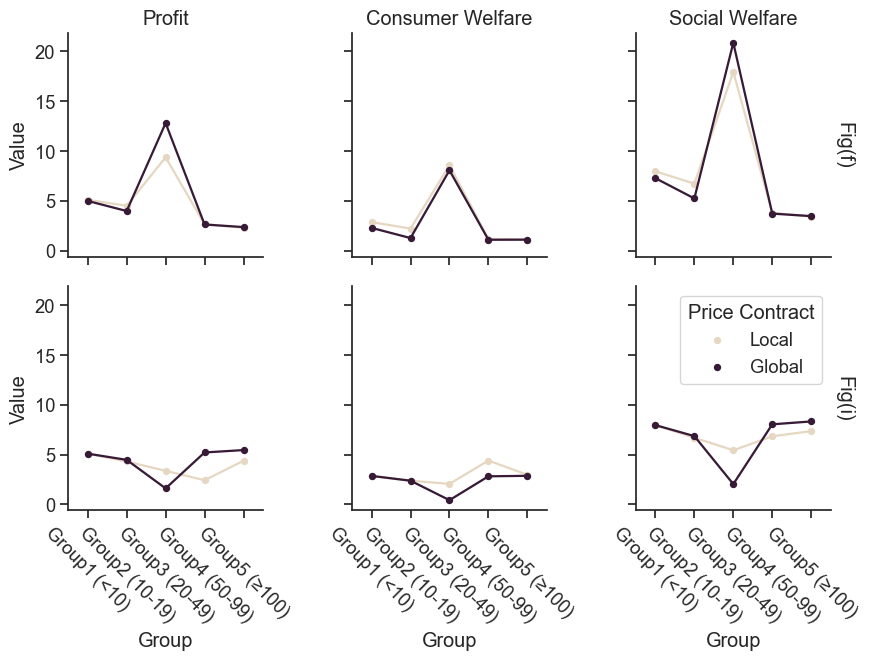

In [25]:
%matplotlib inline
# Pointplot
counter_fi = sns.FacetGrid(welfare_fi, row="Figure", col="Type", margin_titles=True)
counter_fi.map(sns.pointplot, "Group", "Value", "Method",
              palette="ch:.25",
              legend=False,
              scale=0.6)

counter_fi.set_titles(col_template="{col_name}", row_template="Fig({row_name})")
counter_fi.set_xticklabels(rotation=-45)

plt.legend(title="Price Contract");

counter_fi.savefig("fig/counter_lc_gb.svg", facecolor="w", dpi=400)

## Comparison (FPD VS Linear VS Nonlinear)

### Profit by Groups

In [26]:
profit_f3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 10.47, "Linear": 5.07, "Nonlinear": 4.98},
              "Group2 (10-19)": {"First-Degree PD": 7.88, "Linear": 4.34, "Nonlinear": 3.97},
              "Group3 (20-49)": {"First-Degree PD": 21.68, "Linear": 11.95, "Nonlinear": 12.78},
              "Group4 (50-99)": {"First-Degree PD": 4.66, "Linear": 1.68, "Nonlinear": 2.62},
              "Group5 (≥100)": {"First-Degree PD": 5.27, "Linear": 1.67, "Nonlinear": 2.36}})
profit_f3["Total"] = profit_f3.sum(axis=1)
profit_f3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,10.47,7.88,21.68,4.66,5.27,49.96
Linear,5.07,4.34,11.95,1.68,1.67,24.71
Nonlinear,4.98,3.97,12.78,2.62,2.36,26.71


In [27]:
profit_i3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 10.47, "Linear": 5.06, "Nonlinear": 5.09},
              "Group2 (10-19)": {"First-Degree PD": 7.88, "Linear": 4.39, "Nonlinear": 4.47},
              "Group3 (20-49)": {"First-Degree PD": 6.94, "Linear": 1.44, "Nonlinear": 1.61},
              "Group4 (50-99)": {"First-Degree PD": 8.60, "Linear": 5.08, "Nonlinear": 5.21},
              "Group5 (≥100)": {"First-Degree PD": 10.07, "Linear": 5.33, "Nonlinear": 5.45}})
profit_i3["Total"] = profit_i3.sum(axis=1)
profit_i3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,10.47,7.88,6.94,8.60,10.07,43.96
Linear,5.06,4.39,1.44,5.08,5.33,21.30
Nonlinear,5.09,4.47,1.61,5.21,5.45,21.83


In [28]:
print(pd.concat([profit_f3, profit_i3], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
First-Degree PD &         10.47 &         10.47 &            7.88 &            7.88 &           21.68 &            6.94 &            4.66 &            8.60 &           5.27 &          10.07 &  49.96 &  43.96 \\
Linear          &          5.07 &          5.06 &            4.34 &            4.39 &           11.95 &            1.44 &            1.68 &            5.08 &           1.67 &           5.33 &  24.71 &  21.30 \\
Nonlinear       &          4.98 &          5.09 &            3.97 &            4.47 &           12.78 &            1.61 &            2.62 &            5.21 &           2.36 &           5.45 &  26.71 &  21.83 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\2131471487.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([profit_f3, profit_i3], axis=1).sort_index(axis=1).to_latex())


### Consumer Welfare by Groups

In [29]:
cs_f3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 0, "Linear": 3.00, "Nonlinear": 2.28},
              "Group2 (10-19)": {"First-Degree PD": 0, "Linear": 1.73, "Nonlinear": 1.26},
              "Group3 (20-49)": {"First-Degree PD": 0, "Linear": 9.35, "Nonlinear": 8.05},
              "Group4 (50-99)": {"First-Degree PD": 0, "Linear": 0.44, "Nonlinear": 1.09},
              "Group5 (≥100)": {"First-Degree PD": 0, "Linear": 0.47, "Nonlinear": 1.10}})
cs_f3["Total"] = cs_f3.sum(axis=1)
cs_f3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,0.00,0.00,0.00,0.00,0.00,0.00
Linear,3.00,1.73,9.35,0.44,0.47,14.99
Nonlinear,2.28,1.26,8.05,1.09,1.10,13.78


In [30]:
cs_i3 = pd.DataFrame({"Group1 (<10)": {"First-Degree PD": 0, "Linear": 3.09, "Nonlinear": 2.86},
              "Group2 (10-19)": {"First-Degree PD": 0, "Linear": 1.78, "Nonlinear": 2.38},
              "Group3 (20-49)": {"First-Degree PD": 0, "Linear": 0.34, "Nonlinear": 0.43},
              "Group4 (50-99)": {"First-Degree PD": 0, "Linear": 3.14, "Nonlinear": 2.82},
              "Group5 (≥100)": {"First-Degree PD": 0, "Linear": 2.99, "Nonlinear": 2.87}})
cs_i3["Total"] = cs_i3.sum(axis=1)
cs_i3

,Group1 (<10),Group2 (10-19),Group3 (20-49),Group4 (50-99),Group5 (≥100),Total
First-Degree PD,0.00,0.00,0.00,0.00,0.00,0.00
Linear,3.09,1.78,0.34,3.14,2.99,11.34
Nonlinear,2.86,2.38,0.43,2.82,2.87,11.36


In [31]:
print(pd.concat([cs_f3, cs_i3], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
First-Degree PD &          0.00 &          0.00 &            0.00 &            0.00 &            0.00 &            0.00 &            0.00 &            0.00 &           0.00 &           0.00 &   0.00 &   0.00 \\
Linear          &          3.00 &          3.09 &            1.73 &            1.78 &            9.35 &            0.34 &            0.44 &            3.14 &           0.47 &           2.99 &  14.99 &  11.34 \\
Nonlinear       &          2.28 &          2.86 &            1.26 &            2.38 &            8.05 &            0.43 &            1.09 &            2.82 &           1.10 &           2.87 &  13.78 &  11.36 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\3349353040.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([cs_f3, cs_i3], axis=1).sort_index(axis=1).to_latex())


### Social Welfare by Groups

In [32]:
sw_f3 = profit_f3 + cs_f3
sw_i3 = profit_i3 + cs_i3
print(pd.concat([sw_f3, sw_i3], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
First-Degree PD &         10.47 &         10.47 &            7.88 &            7.88 &           21.68 &            6.94 &            4.66 &            8.60 &           5.27 &          10.07 &  49.96 &  43.96 \\
Linear          &          8.07 &          8.15 &            6.07 &            6.17 &           21.30 &            1.78 &            2.12 &            8.22 &           2.14 &           8.32 &  39.70 &  32.64 \\
Nonlinear       &          7.26 &          7.95 &            5.23 &            6.85 &           20.83 &            2.04 &            3.71 &            8.03 &           3.46 &           8.32 &  40.49 &  33.19 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\1990454659.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([sw_f3, sw_i3], axis=1).sort_index(axis=1).to_latex())


### Graph

In [33]:
figs = ["f", "i"]
for Type, dfs in {"Profit": [profit_f3, profit_i3],
                 "Consumer Welfare": [cs_f3, cs_i3],
                 "Social Welfare": [sw_f3, sw_i3]}.items():
    for i, df in enumerate(dfs):
        df.reset_index(names="Method", inplace=True)
        df["Type"] = Type
        df["Figure"] = figs[i]

# Create dataframe for visualization
welfare_fi3 = (pd.concat([profit_f3, cs_f3, sw_f3, profit_i3, cs_i3, sw_i3])
                .melt(id_vars=["Method", "Type", "Figure", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_fi3.head()

,Method,Type,Figure,Total,Group,Value
0,First-Degree PD,Profit,f,49.96,Group1 (<10),10.47
1,Linear,Profit,f,24.71,Group1 (<10),5.07
2,Nonlinear,Profit,f,26.71,Group1 (<10),4.98
3,First-Degree PD,Consumer Welfare,f,0.00,Group1 (<10),0.00
4,Linear,Consumer Welfare,f,14.99,Group1 (<10),3.00


D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version.

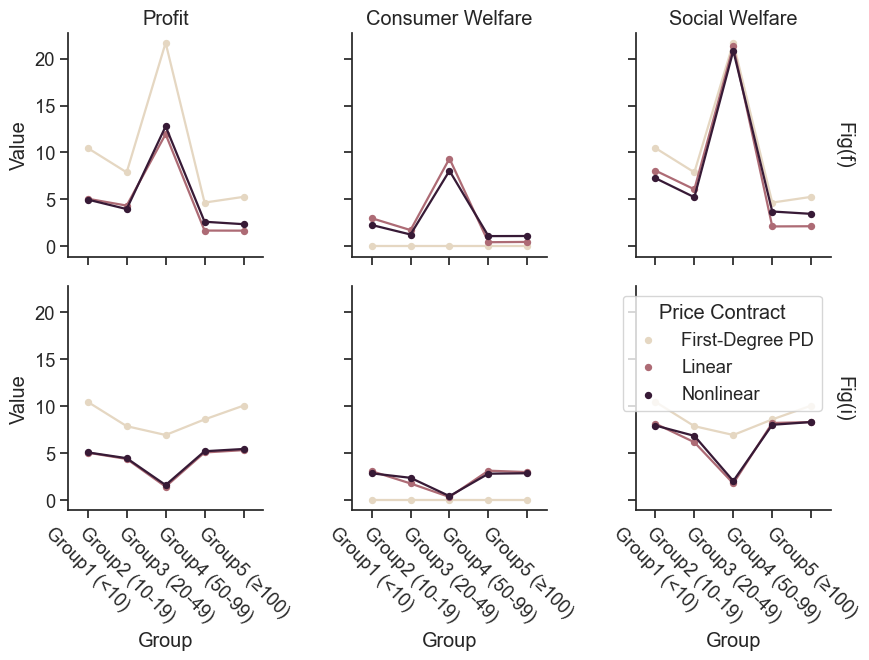

In [34]:
%matplotlib inline
# Pointplot
counter_fi3 = sns.FacetGrid(welfare_fi3, row="Figure", col="Type", margin_titles=True)
counter_fi3.map(sns.pointplot, "Group", "Value", "Method",
                palette="ch:.25",
                legend=False,
                scale=0.6)

counter_fi3.set_titles(col_template="{col_name}", row_template="Fig({row_name})")
counter_fi3.set_xticklabels(rotation=-45)

plt.legend(title="Price Contract");

counter_fi3.savefig("fig/counter_fpd_l_nl.svg", facecolor="w", dpi=400)

## Comparison (Local VS Linear VS Nonlinear)

### Profit by Groups

In [35]:
profit_f3_1 = pd.DataFrame({"Group1 (<10)": {"Local": 5.09, "Linear": 5.07, "Nonlinear": 4.98},
              "Group2 (10-19)": {"Local": 4.50, "Linear": 4.34, "Nonlinear": 3.97},
              "Group3 (20-49)": {"Local": 9.35, "Linear": 11.95, "Nonlinear": 12.78},
              "Group4 (50-99)": {"Local": 2.64, "Linear": 1.68, "Nonlinear": 2.62},
              "Group5 (≥100)": {"Local": 2.29, "Linear": 1.67, "Nonlinear": 2.36}})
profit_f3_1["Total"] = profit_f3_1.sum(axis=1)

profit_i3_1 = pd.DataFrame({"Group1 (<10)": {"Local": 5.09, "Linear": 5.06, "Nonlinear": 5.09},
              "Group2 (10-19)": {"Local": 4.31, "Linear": 4.39, "Nonlinear": 4.47},
              "Group3 (20-49)": {"Local": 3.37, "Linear": 1.44, "Nonlinear": 1.61},
              "Group4 (50-99)": {"Local": 2.43, "Linear": 5.08, "Nonlinear": 5.21},
              "Group5 (≥100)": {"Local": 4.38, "Linear": 5.33, "Nonlinear": 5.45}})
profit_i3_1["Total"] = profit_i3_1.sum(axis=1)

In [36]:
print(pd.concat([profit_f3_1, profit_i3_1], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local     &          5.09 &          5.09 &            4.50 &            4.31 &            9.35 &            3.37 &            2.64 &            2.43 &           2.29 &           4.38 &  23.87 &  19.58 \\
Linear    &          5.07 &          5.06 &            4.34 &            4.39 &           11.95 &            1.44 &            1.68 &            5.08 &           1.67 &           5.33 &  24.71 &  21.30 \\
Nonlinear &          4.98 &          5.09 &            3.97 &            4.47 &           12.78 &            1.61 &            2.62 &            5.21 &           2.36 &           5.45 &  26.71 &  21.83 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\3188006413.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([profit_f3_1, profit_i3_1], axis=1).sort_index(axis=1).to_latex())


### Consumer Welfare by Groups

In [37]:
cs_f3_1 = pd.DataFrame({"Group1 (<10)": {"Local": 2.86, "Linear": 3.00, "Nonlinear": 2.28},
              "Group2 (10-19)": {"Local": 2.21, "Linear": 1.73, "Nonlinear": 1.26},
              "Group3 (20-49)": {"Local": 8.55, "Linear": 9.35, "Nonlinear": 8.05},
              "Group4 (50-99)": {"Local": 1.16, "Linear": 0.44, "Nonlinear": 1.09},
              "Group5 (≥100)": {"Local": 1.10, "Linear": 0.47, "Nonlinear": 1.10}})
cs_f3_1["Total"] = cs_f3_1.sum(axis=1)

cs_i3_1 = pd.DataFrame({"Group1 (<10)": {"Local": 2.86, "Linear": 3.09, "Nonlinear": 2.86},
              "Group2 (10-19)": {"Local": 2.38, "Linear": 1.78, "Nonlinear": 2.38},
              "Group3 (20-49)": {"Local": 2.06, "Linear": 0.34, "Nonlinear": 0.43},
              "Group4 (50-99)": {"Local": 4.40, "Linear": 3.14, "Nonlinear": 2.82},
              "Group5 (≥100)": {"Local": 2.97, "Linear": 2.99, "Nonlinear": 2.87}})
cs_i3_1["Total"] = cs_i3_1.sum(axis=1)

In [38]:
print(pd.concat([cs_f3_1, cs_i3_1], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local     &          2.86 &          2.86 &            2.21 &            2.38 &            8.55 &            2.06 &            1.16 &            4.40 &           1.10 &           2.97 &  15.88 &  14.67 \\
Linear    &          3.00 &          3.09 &            1.73 &            1.78 &            9.35 &            0.34 &            0.44 &            3.14 &           0.47 &           2.99 &  14.99 &  11.34 \\
Nonlinear &          2.28 &          2.86 &            1.26 &            2.38 &            8.05 &            0.43 &            1.09 &            2.82 &           1.10 &           2.87 &  13.78 &  11.36 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\1281365096.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([cs_f3_1, cs_i3_1], axis=1).sort_index(axis=1).to_latex())


### Social Welfare by Groups

In [39]:
sw_f3_1 = profit_f3_1 + cs_f3_1
sw_i3_1 = profit_i3_1 + cs_i3_1
print(pd.concat([sw_f3_1, sw_i3_1], axis=1).sort_index(axis=1).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  Group1 (<10) &  Group1 (<10) &  Group2 (10-19) &  Group2 (10-19) &  Group3 (20-49) &  Group3 (20-49) &  Group4 (50-99) &  Group4 (50-99) &  Group5 (≥100) &  Group5 (≥100) &  Total &  Total \\
\midrule
Local     &          7.95 &          7.95 &            6.71 &            6.69 &           17.90 &            5.43 &            3.80 &            6.83 &           3.39 &           7.35 &  39.75 &  34.25 \\
Linear    &          8.07 &          8.15 &            6.07 &            6.17 &           21.30 &            1.78 &            2.12 &            8.22 &           2.14 &           8.32 &  39.70 &  32.64 \\
Nonlinear &          7.26 &          7.95 &            5.23 &            6.85 &           20.83 &            2.04 &            3.71 &            8.03 &           3.46 &           8.32 &  40.49 &  33.19 \\
\bottomrule
\end{tabular}



C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\1806059569.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([sw_f3_1, sw_i3_1], axis=1).sort_index(axis=1).to_latex())


### Graph

In [40]:
figs = ["f", "i"]
for Type, dfs in {"Profit": [profit_f3_1, profit_i3_1],
                 "Consumer Welfare": [cs_f3_1, cs_i3_1],
                 "Social Welfare": [sw_f3_1, sw_i3_1]}.items():
    for i, df in enumerate(dfs):
        df.reset_index(names="Method", inplace=True)
        df["Type"] = Type
        df["Figure"] = figs[i]

# Create dataframe for visualization
welfare_fi3_1 = (pd.concat([profit_f3_1, cs_f3_1, sw_f3_1, profit_i3_1, cs_i3_1, sw_i3_1])
                .melt(id_vars=["Method", "Type", "Figure", "Total"],
                      var_name="Group",
                      value_name="Value"))
welfare_fi3_1.head()

,Method,Type,Figure,Total,Group,Value
0,Local,Profit,f,23.87,Group1 (<10),5.09
1,Linear,Profit,f,24.71,Group1 (<10),5.07
2,Nonlinear,Profit,f,26.71,Group1 (<10),4.98
3,Local,Consumer Welfare,f,15.88,Group1 (<10),2.86
4,Linear,Consumer Welfare,f,14.99,Group1 (<10),3.00


D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
D:\Users\lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version.

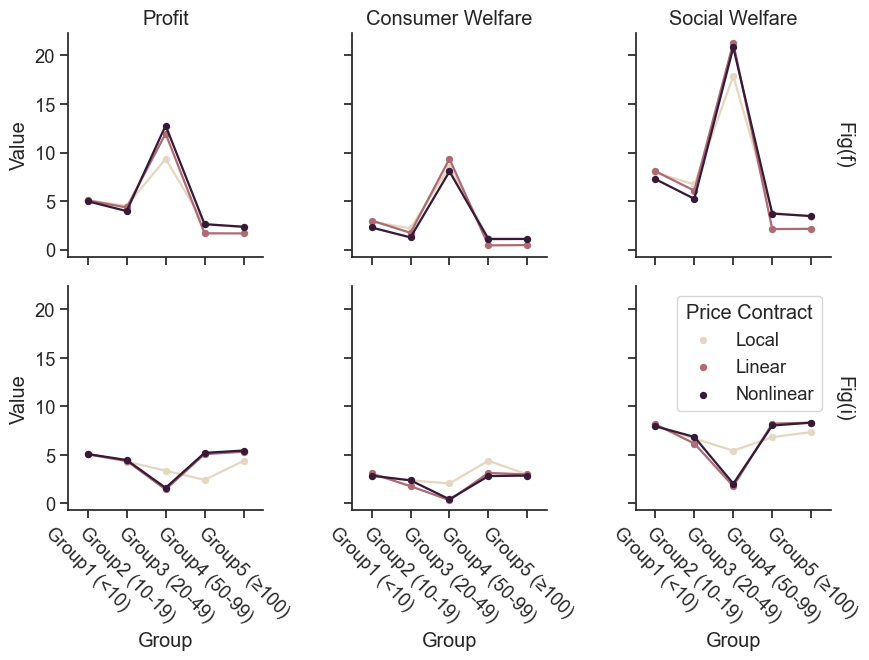

In [41]:
%matplotlib inline
# Pointplot
counter_fi3_1 = sns.FacetGrid(welfare_fi3_1, row="Figure", col="Type", margin_titles=True)
counter_fi3_1.map(sns.pointplot, "Group", "Value", "Method",
              palette="ch:.25",
              legend=False,
              scale = 0.6)

counter_fi3_1.set_titles(col_template="{col_name}", row_template="Fig({row_name})")
counter_fi3_1.set_xticklabels(rotation=-45)

plt.legend(title="Price Contract");

counter_fi3_1.savefig("fig/counter_lc_l_nl.svg", facecolor="w", dpi=400)

# Counterfactual(Cost) <a name="cost"></a>

### Previous Simulation

In [42]:
# Matched with previous simulation
currQ = [0,9,10,19,20,49,50,99,100,200]
c1x0P = np.array([0.00, 2380.37, 2343.75, 2343.75, 2049.32, 2049.32, 2022.95, 2022.95, 2056.64, 2056.64])
nonlinP = np.array([0.00, 2681.64, 2476.56, 2476.56, 2132.81, 2132.81, 2125.00, 2125.00, 2132.81, 2132.81])
c1x2P = np.array([0.00, 3079.83, 2493.90, 2493.90, 2132.57, 2132.57, 2135.01, 2135.01, 2139.89, 2139.89])
c1x3P = np.array([0.00, 4525.39, 2474.61, 2474.61, 2189.45, 2189.45, 2140.62, 2140.62, 2142.58, 2142.58])
c1x4P = np.array([0.00, 6453.12, 2604.49, 2604.49, 2218.26, 2218.26, 2160.16, 2160.16, 2146.48, 2146.48])
c1x5P = np.array([0.00, 6453.12, 2787.35, 2787.35, 2237.06, 2237.06, 2160.16, 2160.16, 2146.48, 2146.48])
c1x6P = np.array([0.00, 7505.86, 2906.25, 2906.25, 2326.17, 2326.17, 2140.62, 2140.62, 2142.58, 2142.58])
for lst in [c1x0P, nonlinP, c1x2P, c1x3P, c1x4P, c1x5P, c1x6P]:
    lst[0] = lst[1]

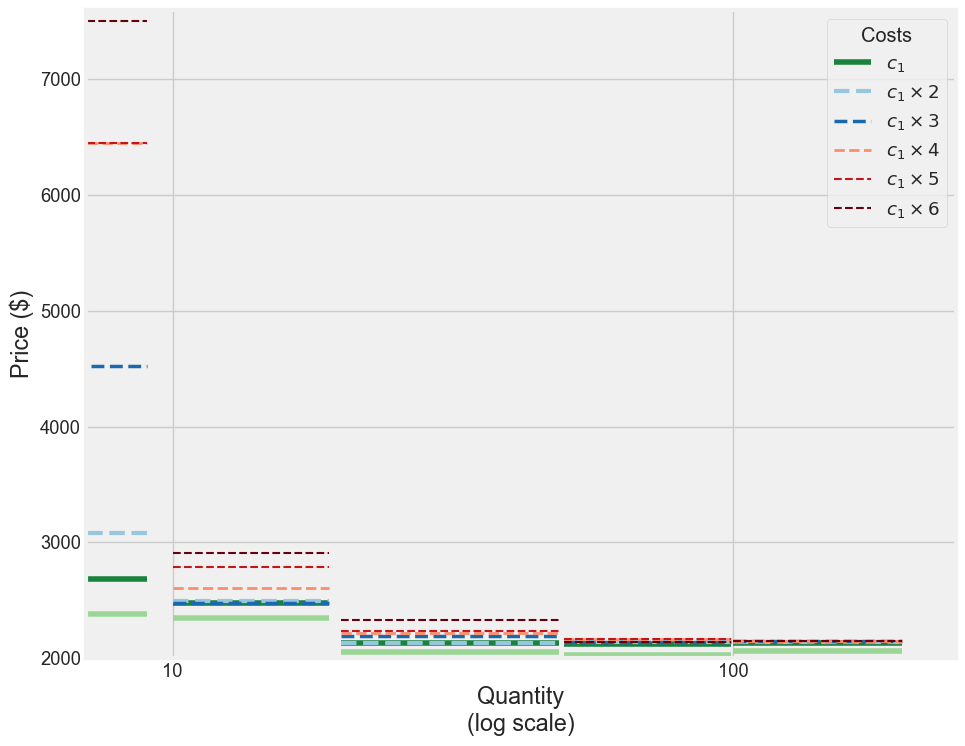

In [43]:
# Barplot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')
cmapb = cm.get_cmap('Blues')
cmapg = cm.get_cmap('Greens')
cmapr = cm.get_cmap('Reds')

for i in range(int(len(currQ)/2)):
    ax.plot(currQ[2*i:2*i+2],c1x0P[2*i:2*i+2],color=cmapg(100),linewidth=4,linestyle='-',label=r'$c_1 \times 0$')
    ax.plot(currQ[2*i:2*i+2],nonlinP[2*i:2*i+2],color=cmapg(200),linewidth=4,linestyle='-',label=r'$c_1$')
    ax.plot(currQ[2*i:2*i+2],c1x2P[2*i:2*i+2],color=cmapb(100),linewidth=3,linestyle='--',label=r'$c_1 \times 2$')
    ax.plot(currQ[2*i:2*i+2],c1x3P[2*i:2*i+2],color=cmapb(200),linewidth=2.5,linestyle='--',label=r'$c_1 \times 3$')
    ax.plot(currQ[2*i:2*i+2],c1x4P[2*i:2*i+2],color=cmapr(100),linewidth=2,linestyle='--',label=r'$c_1 \times 4$')
    ax.plot(currQ[2*i:2*i+2],c1x5P[2*i:2*i+2],color=cmapr(200),linewidth=1.5,linestyle='--',label=r'$c_1 \times 5$')
    ax.plot(currQ[2*i:2*i+2],c1x6P[2*i:2*i+2],color=cmapr(300),linewidth=1.5,linestyle='--',label=r'$c_1 \times 6$')

ax.set_xlabel('Quantity\n(log scale)'); ax.set_ylabel('Price ($)')
ax.axhline(y = 1500, color = 'black', linewidth = 1, alpha =0.7)
ax.axvline(x = 0, color = 'black', linewidth = 1, alpha =0.7)
ax.set_ylim((2000,7600))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-6:], labels[-6:], title='Costs')
ax.set_xscale('log')
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim((7,250))
fig.savefig("fig/counter_cost.svg", dpi=400)
plt.show()

In [44]:
# Group by quantities
def create_price_df(group_lst, price_lst, cost):
    df = pd.DataFrame({"Group": group_lst,
                       "Price": price_lst,
                       "Cost": [cost] * len(group_lst)})
    return(df)

# Add price to q=0
def create_price_lst(prices):
    return([prices[2 * i] for i in range(int(len(prices)/2))])

In [45]:
# Creat group-price dataframe
groups = ["Group{}".format(i) for i in ["1 (<10)", "2 (10-19)",
                                        "3 (20-49)", "4 (50-99)",
                                        "5 (≥100)"]]

cost = pd.DataFrame(columns=["Group", "Price", "Cost"])
for c, p in {"$c_1 × 0$": c1x0P, "$c_1$": nonlinP, "$c_1 × 2$": c1x2P,
             "$c_1 × 3$": c1x3P, "$c_1 × 4$": c1x4P, "$c_1 × 5$": c1x5P,
             "$c_1 × 6$": c1x6P}.items():
    cost = pd.concat([cost, create_price_df(groups, create_price_lst(p), c)])

cost.head()

,Group,Price,Cost
0,Group1 (<10),2380.37,$c_1 × 0$
1,Group2 (10-19),2343.75,$c_1 × 0$
2,Group3 (20-49),2049.32,$c_1 × 0$
3,Group4 (50-99),2022.95,$c_1 × 0$
4,Group5 (≥100),2056.64,$c_1 × 0$


C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\48887881.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.figure.show();


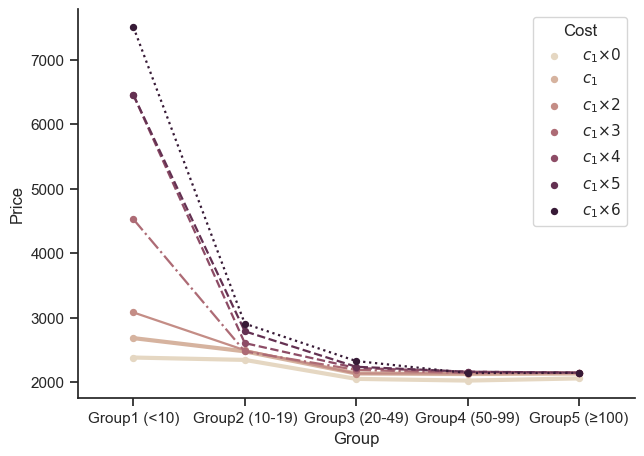

In [46]:
# Pointplot
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
p = sns.pointplot(x="Group", y="Price", data=cost,
              hue="Cost", palette="ch:.25", scale=0.6,
              linestyles=["-", "-", "-", "-.", "--", "--", ":"])
# plt.setp(p.collections, alpha=0.3) 
# plt.setp(p.lines, alpha=0.8)
plt.setp(p.lines[0:7], lw=3)
# plt.fill_between(cost.Price, cost.Group)
p.figure.savefig("fig/counter_cost_point.svg", facecolor="w", dpi=400)
p.figure.show();

### Robustness Check

In [47]:
# Another simulation
currQ = [0,9,10,19,20,49,50,99,100,200]
c1x0P = np.array( [0.0, 2379.0, 2383.0, 2383.0, 2070.0, 2070.0, 1939.0, 1939.0, 1977.0, 1977.0])
nonlinP = np.array( [0.0, 2681.0, 2473.0, 2473.0, 2073.0, 2073.0, 2031.0, 2031.0, 1945.0, 1945.0])
c1x2P = np.array([0.0, 3032.0, 2524.0, 2524.0, 2170.0, 2170.0, 2163.0, 2163.0, 2164.0, 2164.0])
c1x3P = np.array([0.0, 4485.0, 2466.0, 2466.0, 2172.0, 2172.0, 2163.0, 2163.0, 2164.0, 2164.0])
c1x4P = np.array([0.0, 5000.0, 2642.0, 2642.0, 2268.0, 2268.0, 2163.0, 2163.0, 2164.0, 2164.0])
c1x5P = np.array([0.0, 5000.0, 2827.0, 2827.0, 2268.0, 2268.0, 2163.0, 2163.0, 2164.0, 2164.0])
for lst in [c1x0P, nonlinP, c1x2P, c1x3P, c1x4P, c1x5P]:
    lst[0] = lst[1]

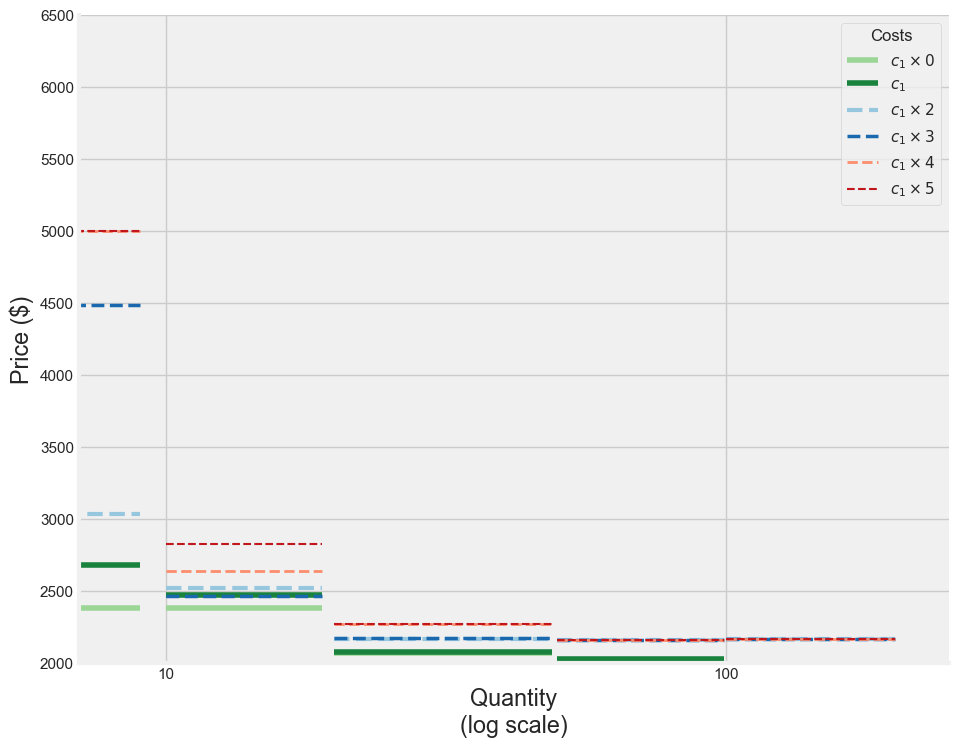

In [48]:
# Barplot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')
cmapb = cm.get_cmap('Blues')
cmapg = cm.get_cmap('Greens')
cmapr = cm.get_cmap('Reds')

for i in range(int(len(currQ)/2)):
    ax.plot(currQ[2*i:2*i+2],c1x0P[2*i:2*i+2],color=cmapg(100),linewidth=4,linestyle='-',label=r'$c_1 \times 0$')
    ax.plot(currQ[2*i:2*i+2],nonlinP[2*i:2*i+2],color=cmapg(200),linewidth=4,linestyle='-',label=r'$c_1$')
    ax.plot(currQ[2*i:2*i+2],c1x2P[2*i:2*i+2],color=cmapb(100),linewidth=3,linestyle='--',label=r'$c_1 \times 2$')
    ax.plot(currQ[2*i:2*i+2],c1x3P[2*i:2*i+2],color=cmapb(200),linewidth=2.5,linestyle='--',label=r'$c_1 \times 3$')
    ax.plot(currQ[2*i:2*i+2],c1x4P[2*i:2*i+2],color=cmapr(100),linewidth=2,linestyle='--',label=r'$c_1 \times 4$')
    ax.plot(currQ[2*i:2*i+2],c1x5P[2*i:2*i+2],color=cmapr(200),linewidth=1.5,linestyle='--',label=r'$c_1 \times 5$')

ax.set_xlabel('Quantity\n(log scale)'); ax.set_ylabel('Price ($)')
ax.axhline(y = 1500, color = 'black', linewidth = 1, alpha =0.7)
ax.axvline(x = 0, color = 'black', linewidth = 1, alpha =0.7)
ax.set_ylim((2000,6500))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-6:], labels[-6:], title='Costs')
ax.set_xscale('log')
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim((7,250))
fig.savefig("fig/counter_cost1.svg", dpi=400)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_42868\3810668581.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.figure.show();


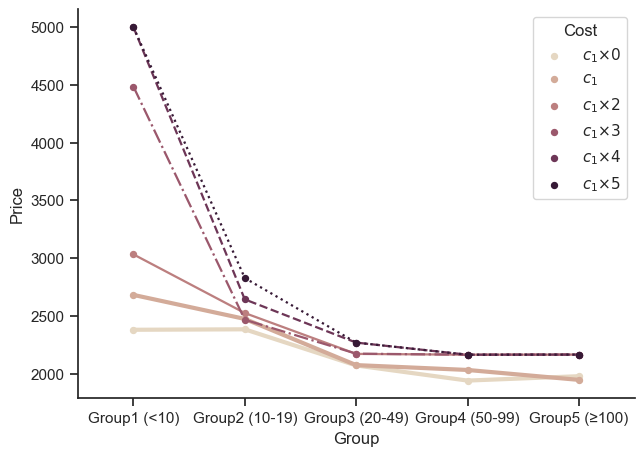

In [49]:
# Creat group-price dataframe
groups = ["Group{}".format(i) for i in ["1 (<10)", "2 (10-19)",
                                        "3 (20-49)", "4 (50-99)",
                                        "5 (≥100)"]]

cost = pd.DataFrame(columns=["Group", "Price", "Cost"])
for c, p in {"$c_1 × 0$": c1x0P, "$c_1$": nonlinP, "$c_1 × 2$": c1x2P,
             "$c_1 × 3$": c1x3P, "$c_1 × 4$": c1x4P, "$c_1 × 5$": c1x5P}.items():
    cost = pd.concat([cost, create_price_df(groups, create_price_lst(p), c)])

# Pointplot
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
p = sns.pointplot(x="Group", y="Price", data=cost,
              hue="Cost", palette="ch:.25", scale=0.6,
              linestyles=["-", "-", "-", "-.", "--", ":"])
# plt.setp(p.collections, alpha=0.3) 
# plt.setp(p.lines, alpha=0.8)
plt.setp(p.lines[0:7], lw=3)
# plt.fill_between(cost.Price, cost.Group)
p.figure.savefig("fig/counter_cost_point1.svg", facecolor="w", dpi=400)
p.figure.show();